In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [168]:
summer = pd.read_csv ('C://Users/psy_f/Desktop/python/archive/summer.csv', sep = ',')
winter = pd.read_csv ('C://Users/psy_f/Desktop/python/archive/winter.csv', sep = ',')
dictionary = pd.read_csv ('C://Users/psy_f/Desktop/python/archive/dictionary.csv', sep = ',')

In [169]:
summer.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [170]:
winter.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [171]:
dictionary.head(5)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


# Часть 1. Обработка данных.

Для удобства анализа объединим таблицы зимних и летних Олимпийских игр:

In [172]:
summer['Type'] = 'Summer'
winter['Type'] = 'Winter'
olympics = pd.concat ([summer, winter], axis = 0)
olympics

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Type
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


Проверим данные в таблицах на полноту. Из анализа видно, что в таблице Olympics отсутствуют данные о стране в 4 строках. Отфильтруем таблицу по этому критерию, чтобы увидеть, для каких именно ивентов недостаёт данных.

In [173]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 5769
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36935 non-null  int64 
 1   City        36935 non-null  object
 2   Sport       36935 non-null  object
 3   Discipline  36935 non-null  object
 4   Athlete     36935 non-null  object
 5   Country     36931 non-null  object
 6   Gender      36935 non-null  object
 7   Event       36935 non-null  object
 8   Medal       36935 non-null  object
 9   Type        36935 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [174]:
olympics[olympics['Country'].isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Type
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,Summer
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,Summer
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,Summer
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,Summer


Из таблицы выше также можем обратить внимание, что присутствуют строки, где вместо имени атлета указано "pending". Отфильтруем таблицу по столбцу с такими значениями:

In [175]:
olympics.query('Athlete == "Pending"')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Type
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,Summer
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,Summer
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,Summer


Найдём в открытых источниках недостающие данные и дополним ими таблицу, затем убедимся, что мы успешно присвоили новые значения:

In [176]:
pd.set_option('mode.chained_assignment', None) #чтобы Pandas не ругался на перезапись данных
olympics['Country'].loc[29603]='BAH'
olympics['Country'].loc[31072]='CAN'
olympics['Country'].loc[31091]='KOR'
olympics['Country'].loc[31110]='RUS'
olympics['Athlete'].loc[29603]='YUSUF JAMAL, Maryam'
olympics['Athlete'].loc[31072]='GIRARD, Christine'
olympics['Athlete'].loc[31091]='MIN-JAE, Kim'
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 5769
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36935 non-null  int64 
 1   City        36935 non-null  object
 2   Sport       36935 non-null  object
 3   Discipline  36935 non-null  object
 4   Athlete     36935 non-null  object
 5   Country     36935 non-null  object
 6   Gender      36935 non-null  object
 7   Event       36935 non-null  object
 8   Medal       36935 non-null  object
 9   Type        36935 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.1+ MB


# Часть 2. Выявляем наиболее титулованных спортсменов и спортсменок.

In [177]:
top_winter_athletes_count = olympics \
    .query ('Type == "Winter"') \
    .groupby(['Athlete','Medal','Discipline'],as_index = False) \
    .agg({'Year':'count'}) \
    .rename (columns = {'Year':'Total_medals'})

In [178]:
top_summer_athletes_count = olympics \
    .query ('Type == "Summer"') \
    .groupby(['Athlete','Medal','Discipline'],as_index = False) \
    .agg({'Year':'count'}) \
    .rename (columns = {'Year':'Total_medals'})

### Зимние Олимпийские игры

In [179]:
top_winter_athletes = top_winter_athletes_count \
    .pivot (index = ['Athlete','Discipline'], columns = 'Medal', values = 'Total_medals') \
    .reset_index() \
    .fillna(0) \
    .sort_values ('Gold',ascending = False) \
    .head(10) \
    .reset_index()

top_winter_athletes[list(['Gold','Silver','Bronze'])] = \
    top_winter_athletes[list(['Gold','Silver','Bronze'])].astype(int) # округили количество медалей до целого
top_winter_athletes=top_winter_athletes[['Athlete', 'Discipline', 'Gold', 'Silver','Bronze']] # поменяли столбцы местами
top_winter_athletes

Medal,Athlete,Discipline,Gold,Silver,Bronze
0,"DAEHLIE, Björn",Cross Country Skiing,8,4,0
1,"BJOERNDALEN, Ole Einar",Biathlon,8,4,1
2,"SKOBLIKOVA, Lidiya",Speed skating,6,0,0
3,"BJOERGEN, Marit",Cross Country Skiing,6,2,1
4,"EGOROVA, Ljubov",Cross Country Skiing,6,3,0
5,"THUNBERG, Clas",Speed skating,5,1,1
6,"LAZUTINA, Larissa",Cross Country Skiing,5,1,1
7,"ALSGAARD, Thomas",Cross Country Skiing,5,1,0
8,"PECHSTEIN, Claudia",Speed skating,5,2,2
9,"HEIDEN, Eric",Speed skating,5,0,0


### Летние Олимпийские игры

In [180]:
top_summer_athletes = top_summer_athletes_count \
    .pivot (index = ['Athlete','Discipline'], columns = 'Medal', values = 'Total_medals') \
    .reset_index() \
    .fillna(0) \
    .sort_values ('Gold',ascending = False) \
    .head(10) \
    .reset_index()

top_summer_athletes[list(['Gold','Silver','Bronze'])] = \
    top_summer_athletes[list(['Gold','Silver','Bronze'])].astype(int) # округили количество медалей до целого
top_summer_athletes=top_summer_athletes[['Athlete', 'Discipline', 'Gold', 'Silver','Bronze']] # поменяли столбцы местами
top_summer_athletes


Medal,Athlete,Discipline,Gold,Silver,Bronze
0,"PHELPS, Michael",Swimming,18,2,2
1,"LATYNINA, Larisa",Artistic G.,9,5,4
2,"SPITZ, Mark",Swimming,9,1,1
3,"LEWIS, Carl",Athletics,9,1,0
4,"NURMI, Paavo",Athletics,9,3,0
5,"THOMPSON, Jenny",Swimming,8,3,1
6,"KATO, Sawao",Artistic G.,8,3,1
7,"FISCHER, Birgit",Canoe / Kayak F,8,4,0
8,"EWRY, Ray",Athletics,8,0,0
9,"BIONDI, Matthew",Swimming,8,2,1


Среди зимних Олимпийских видов спорта атлетом с наибольшим количеством золотых медалей оказался Бьорн Дэли, который завоевал 8 золотых медалей в лыжных гонках. Среди летних видов - пловец Майкл Фелпс с 18 золотыми медалями. Важно отметить, что среди наиболее успешных атлетов чаще всего встречаются представители таких видов спорта, как плавание, конькобежный спорт, лыжные гонки и биатлон, что может быть обусловлено тем, что у спортсмена есть возможность участвовать сразу в нескольких смежных видах дисциплин (например, заплыв на 100, 200 или 400 метров), где атлет может одинаково хорошо проявлять свои навыки.

# Часть 3. Выявляем страны-участницы с наибольшим числом олимпийских медалей.

### Обработка данных

In [181]:
olympics.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Type
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [182]:
olympics = pd.merge(olympics, dictionary[['Country', 'Code']], how='left',\
                  left_on='Country', right_on='Code', suffixes=['_ol','_dict'])

In [184]:
olympics.dropna()

,Year,City,Sport,Discipline,Athlete,Country_ol,Gender,Event,Medal,Type,Country_dict,Code
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,HUN
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer,Austria,AUT
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer,Greece,GRE
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer,Greece,GRE
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer,Greece,GRE
...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter,United Kingdom,GBR
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter,United States,USA
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter,Canada,CAN
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter,Czech Republic,CZE


Перед визуализацией данных о количестве наград необходимо учесть тот факт, что в случае командных видов спорта (баскетбол, хоккей и др.), в массиве присутствуют все участники сборных команд-призёров. Таким образом, более корректного подсчёта медалей, мы создадим в таблице столбец 'Concat_info', для отслеживания уникальных наград в групповых видах спорта.

In [193]:
olympics['Concat_info'] = olympics['Event']+olympics['Year'].astype(str)+olympics['Medal']+olympics['Gender']
olympics = olympics.rename(columns ={'Country_dict':'Country'})

### Зимние Олимпийские игры

In [228]:
top_winter_countries_count = olympics \
    .query ('Type == "Winter"') \
    .groupby(['Country','Medal'],as_index = False) \
    .agg({'Concat_info':'nunique'})
olympics_number_winter = olympics \
    .query ('Type == "Winter"') \
    .groupby(['Country'], as_index = False) \
    .agg({'Year':'nunique'}) \
    .rename(columns = {'Year':'Olympics_number'})

In [229]:
top_winter_countries_count = pd.merge (top_winter_countries_count, olympics_number_winter, how='left', on=['Country'])
top_winter_countries_count['Avg Medals per Olympics']= \
        top_winter_countries_count['Concat_info']/top_winter_countries_count['Olympics_number']

In [230]:
top_winter_countries = top_winter_countries_count \
    .pivot (index = ['Country'], columns = 'Medal', values = 'Concat_info') \
    .reset_index() \
    .fillna(0) \
    .sort_values ('Gold',ascending = False)
top_winter_countries['Total'] = top_winter_countries['Gold']+top_winter_countries['Silver']+top_winter_countries['Bronze']
top_winter_countries[list(['Gold','Silver','Bronze','Total'])] = \
    top_winter_countries[list(['Gold','Silver','Bronze','Total'])].astype(int) # округили количество медалей до целого

In [231]:
top_winter_countries = pd \
    .merge(top_winter_countries, olympics_number_winter, how='left', on='Country') \
    .head(10)

top_winter_countries = top_winter_countries[['Country','Gold','Silver','Bronze','Total','Olympics_number']]
top_winter_countries

,Country,Gold,Silver,Bronze,Total,Olympics_number
0,Norway,118,111,100,329,22
1,United States,92,103,87,282,22
2,Germany,77,76,54,207,10
3,Canada,64,60,56,180,22
4,Austria,61,80,82,223,22
5,Russia,58,47,37,142,6
6,Sweden,50,40,54,144,22
7,Switzerland,50,40,47,137,21
8,Finland,42,63,57,162,22
9,Netherlands,37,38,34,109,15


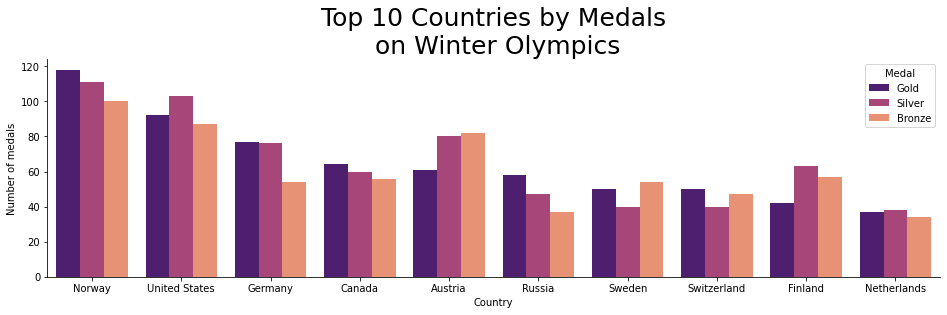

In [252]:
plt.figure(figsize=(16,4))
sns.barplot(x='Country', y='Concat_info'\
            ,data=top_winter_countries_count\
            ,hue = 'Medal'\
            ,hue_order=['Gold','Silver','Bronze']\
            ,order=list(top_winter_countries['Country'])\
            ,palette = "magma")
plt.title('Top 10 Countries by Medals\n on Winter Olympics', size=25)
plt.ylabel('Number of medals')
sns.despine();

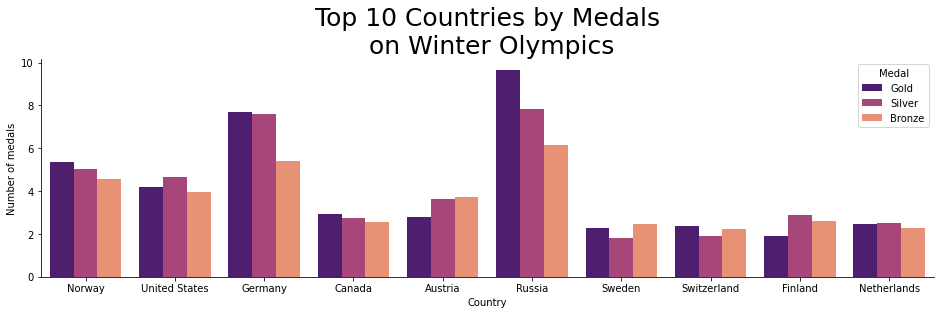

In [253]:
plt.figure(figsize=(16,4))
sns.barplot(x='Country', y='Avg Medals per Olympics'\
            ,data=top_winter_countries_count\
            ,hue = 'Medal'\
            ,hue_order=['Gold','Silver','Bronze']\
            ,order=list(top_winter_countries['Country'])\
            ,palette = "magma")
plt.title('Top 10 Countries by Medals\n on Winter Olympics', size=25)
plt.ylabel('Number of medals')
sns.despine();

Как видно из анализа стран-участниц Зимних Олимпийских игр, Норвегия является абсолютным чемпионом не только по общему числу наград, но также и по каждому виду медалей по отдельности. Однако, важно учесть факт, что при обработке данных мы исключали из анализа ныне несуществующие государства, так как возникла бы проблема с сопоставлением их наград между текущими странами-участницами. Тем не менее, если учитывать такой фактор, как количество Олимпийских игр, в которых та или иная сборная принимала участие, то у России наиболее высокие показатели, так как при относительно меньшем количестве участий в Зимних Олимпиадах, Россия завоевала большее количество наград в условиях того, что она начала существовать как независимое государство только в конце 20 века.

### Летние Олимпийские игры

In [239]:
top_summer_countries_count = olympics \
    .query ('Type == "Summer"') \
    .groupby(['Country','Medal'],as_index = False) \
    .agg({'Concat_info':'nunique'})
olympics_number_summer = olympics \
    .query ('Type == "Summer"') \
    .groupby(['Country'], as_index = False) \
    .agg({'Year':'nunique'}) \
    .rename(columns = {'Year':'Olympics_number'})

In [240]:
top_summer_countries_count = pd.merge (top_summer_countries_count, olympics_number_summer, how='left', on=['Country'])
top_summer_countries_count['Avg Medals per Olympics']= \
        top_summer_countries_count['Concat_info']/top_summer_countries_count['Olympics_number']

In [241]:
top_summer_countries = top_summer_countries_count \
    .pivot (index = ['Country'], columns = 'Medal', values = 'Concat_info') \
    .reset_index() \
    .fillna(0) \
    .sort_values ('Gold',ascending = False)
top_summer_countries['Total'] = top_summer_countries['Gold']+top_summer_countries['Silver']+top_summer_countries['Bronze']
top_summer_countries[list(['Gold','Silver','Bronze','Total'])] = \
    top_summer_countries[list(['Gold','Silver','Bronze','Total'])].astype(int) # округили количество медалей до целого

In [242]:
top_summer_countries = pd \
    .merge(top_summer_countries, olympics_number_summer, how='left', on='Country') \
    .head(10)

top_summer_countries = top_summer_countries[['Country','Gold','Silver','Bronze','Total','Olympics_number']]
top_summer_countries

,Country,Gold,Silver,Bronze,Total,Olympics_number
0,United States,973,754,659,2386,26
1,United Kingdom,240,279,271,790,27
2,France,202,216,241,659,26
3,Italy,197,167,184,548,25
4,China,187,143,122,452,8
5,Germany,173,182,214,569,15
6,Hungary,166,144,163,473,25
7,Australia,141,152,176,469,24
8,Sweden,134,163,171,468,25
9,Japan,128,125,139,392,20


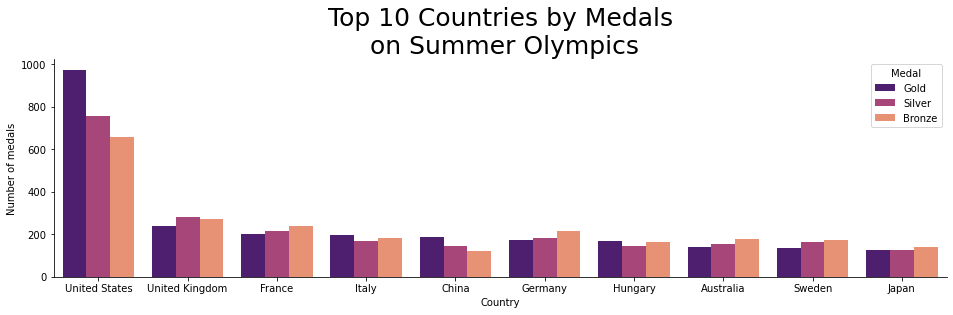

In [254]:
plt.figure(figsize=(16,4))
sns.barplot(x='Country', y='Concat_info'\
            ,data=top_summer_countries_count\
            ,hue = 'Medal'\
            ,hue_order=['Gold','Silver','Bronze']\
            ,order=list(top_summer_countries['Country'])\
            ,palette = "magma")
plt.title('Top 10 Countries by Medals\n on Summer Olympics', size=25)
plt.ylabel('Number of medals')
sns.despine();

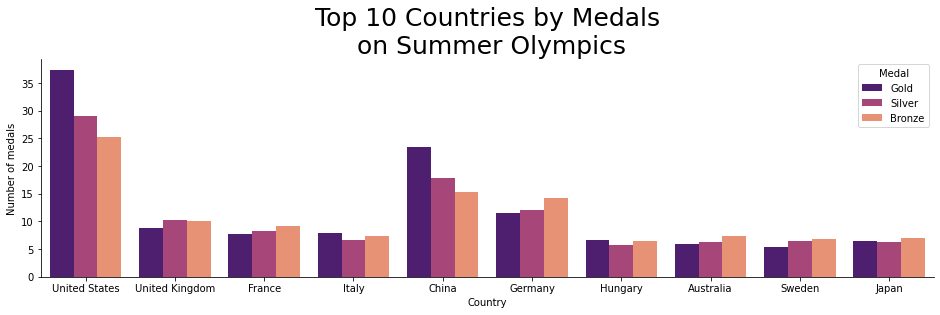

In [255]:
plt.figure(figsize=(16,4))
sns.barplot(x='Country', y='Avg Medals per Olympics'\
            ,data=top_summer_countries_count\
            ,hue = 'Medal'\
            ,hue_order=['Gold','Silver','Bronze']\
            ,order=list(top_summer_countries['Country'])\
            ,palette = "magma")
plt.title('Top 10 Countries by Medals\n on Summer Olympics', size=25)
plt.ylabel('Number of medals')
sns.despine();

Что касается Летних Олимпийских игр, здесь абсолютным лидером является США. Тем не менее, при учёте количетсва ОИ, в которых сборные принимали участие, то Китай и Германия значительно упрочат свои позиции. При том, что по политическим причинам, Китай не принимал участие в ОИ в 1956-1980 годах, а сборные ГДР и ФРГ объединились в одну сборную Германии, для которой и ведётся данная статистика, только на Олимпиаде 1992 года, уровень подготовки их спортсменов является достаточно высоким.